In [1]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import to_rgba
import math
import time
import networkx as nx
import pickle


In [2]:
from NeuralNetwork import * 
from Observation import *
from AgentModule import *
from InitializationVariables import *
from Environment import *
from Evolution import *

imported Neural Network module
Imported initialized Variables
imported Observation
imported Agent module
Imported environ
imported evolution module


In [3]:
#Initialize environment and next_environment

with open('winner-feedforward', 'rb') as f:
    bestGene = pickle.load(f)


environment, agents, environment_pop_density = initialize()
agents = initializeAgents(agent_count, agents, bestGene)
barrierMask = getBarrierMask()
distToBarrier = getBarrierMaskDist(barrierMask)
survivalMask = getSurvivalMask()

In [4]:
# #For an easier environment that reaches equilibrium much faster
barrierMask = getBarrierMask()
barrierMask[0:-1,0:-1] = 0

barrierMask[ 1*environment_ySize//4 :3*environment_ySize//4   , 1*environment_xSize//4 : round(1.3*environment_xSize//4)  ] = 1




survivalMask[0:-1,0:-1] = 0
# survivalMask[environment_xSize//4 : 3*environment_xSize//4, environment_ySize//4 : 3*environment_ySize//4  ]= 1
survivalMask[:, 0 :environment_xSize//4   ]= 1

Text(0.5, 1.0, 'barrierMask')

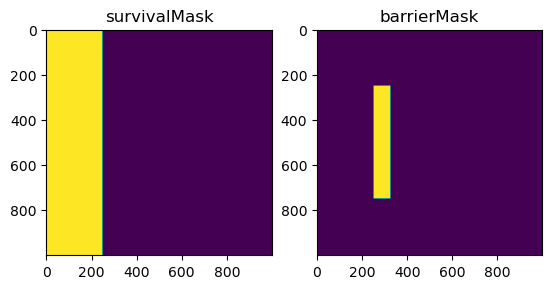

In [5]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.imshow(survivalMask)
ax1.set_title('survivalMask')
ax2.imshow(barrierMask)
ax2.set_title('barrierMask')

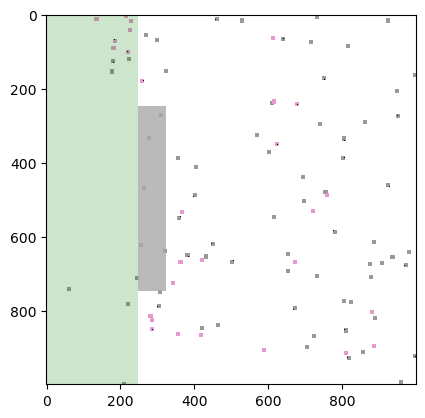

In [7]:
livingAgents, environment, killCount = runCycle(steps_per_cycle, agents, environment, barrierMask, distToBarrier, survivalMask, environment_pop_density, False)
